# MULTIPLE LINEAR REGRESSION 
HOUSING CASE STUDY

###### PROBLEM STATEMENT
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

    To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

    To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

    To know the accuracy of the model, i.e. how well these variables can predict house prices.

So interpretation is important!

## STEP 1:READING AND UNDERSTANDING THE DATA

In [1]:
#IMPORTING THE LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#FILTERING OUT THE WARNINGS
import warnings
warnings.filterwarnings('ignore')

#SETTING UP THE PLOTS VISUALS
sns.set()
%config InlineBackend.figure_format='retina'

In [2]:
# READING THE DATA-SET
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
col_list = list(housing.columns)
col_list

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# CECKING FOR NULL OR RANDOM VALUES
for i in col_list:
    print(housing[i].value_counts())

4200000     17
3500000     17
4900000     12
5250000      9
3150000      9
            ..
11410000     1
8680000      1
6419000      1
8080940      1
8960000      1
Name: price, Length: 219, dtype: int64
6000     24
3000     14
4500     13
4000     11
6600      9
         ..
8800      1
4700      1
7770      1
5720      1
10240     1
Name: area, Length: 284, dtype: int64
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
yes    468
no      77
Name: mainroad, dtype: int64
no     448
yes     97
Name: guestroom, dtype: int64
no     354
yes    191
Name: basement, dtype: int64
no     520
yes     25
Name: hotwaterheating, dtype: int64
no     373
yes    172
Name: airconditioning, dtype: int64
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
no     417
yes    128
Name: prefarea, dtype: int64
semi-furnished    227
unfurn

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## STEP 2: VISUALIZATION OF DATA

### VISUALIZATION OF NUMERICAL VARIABLES

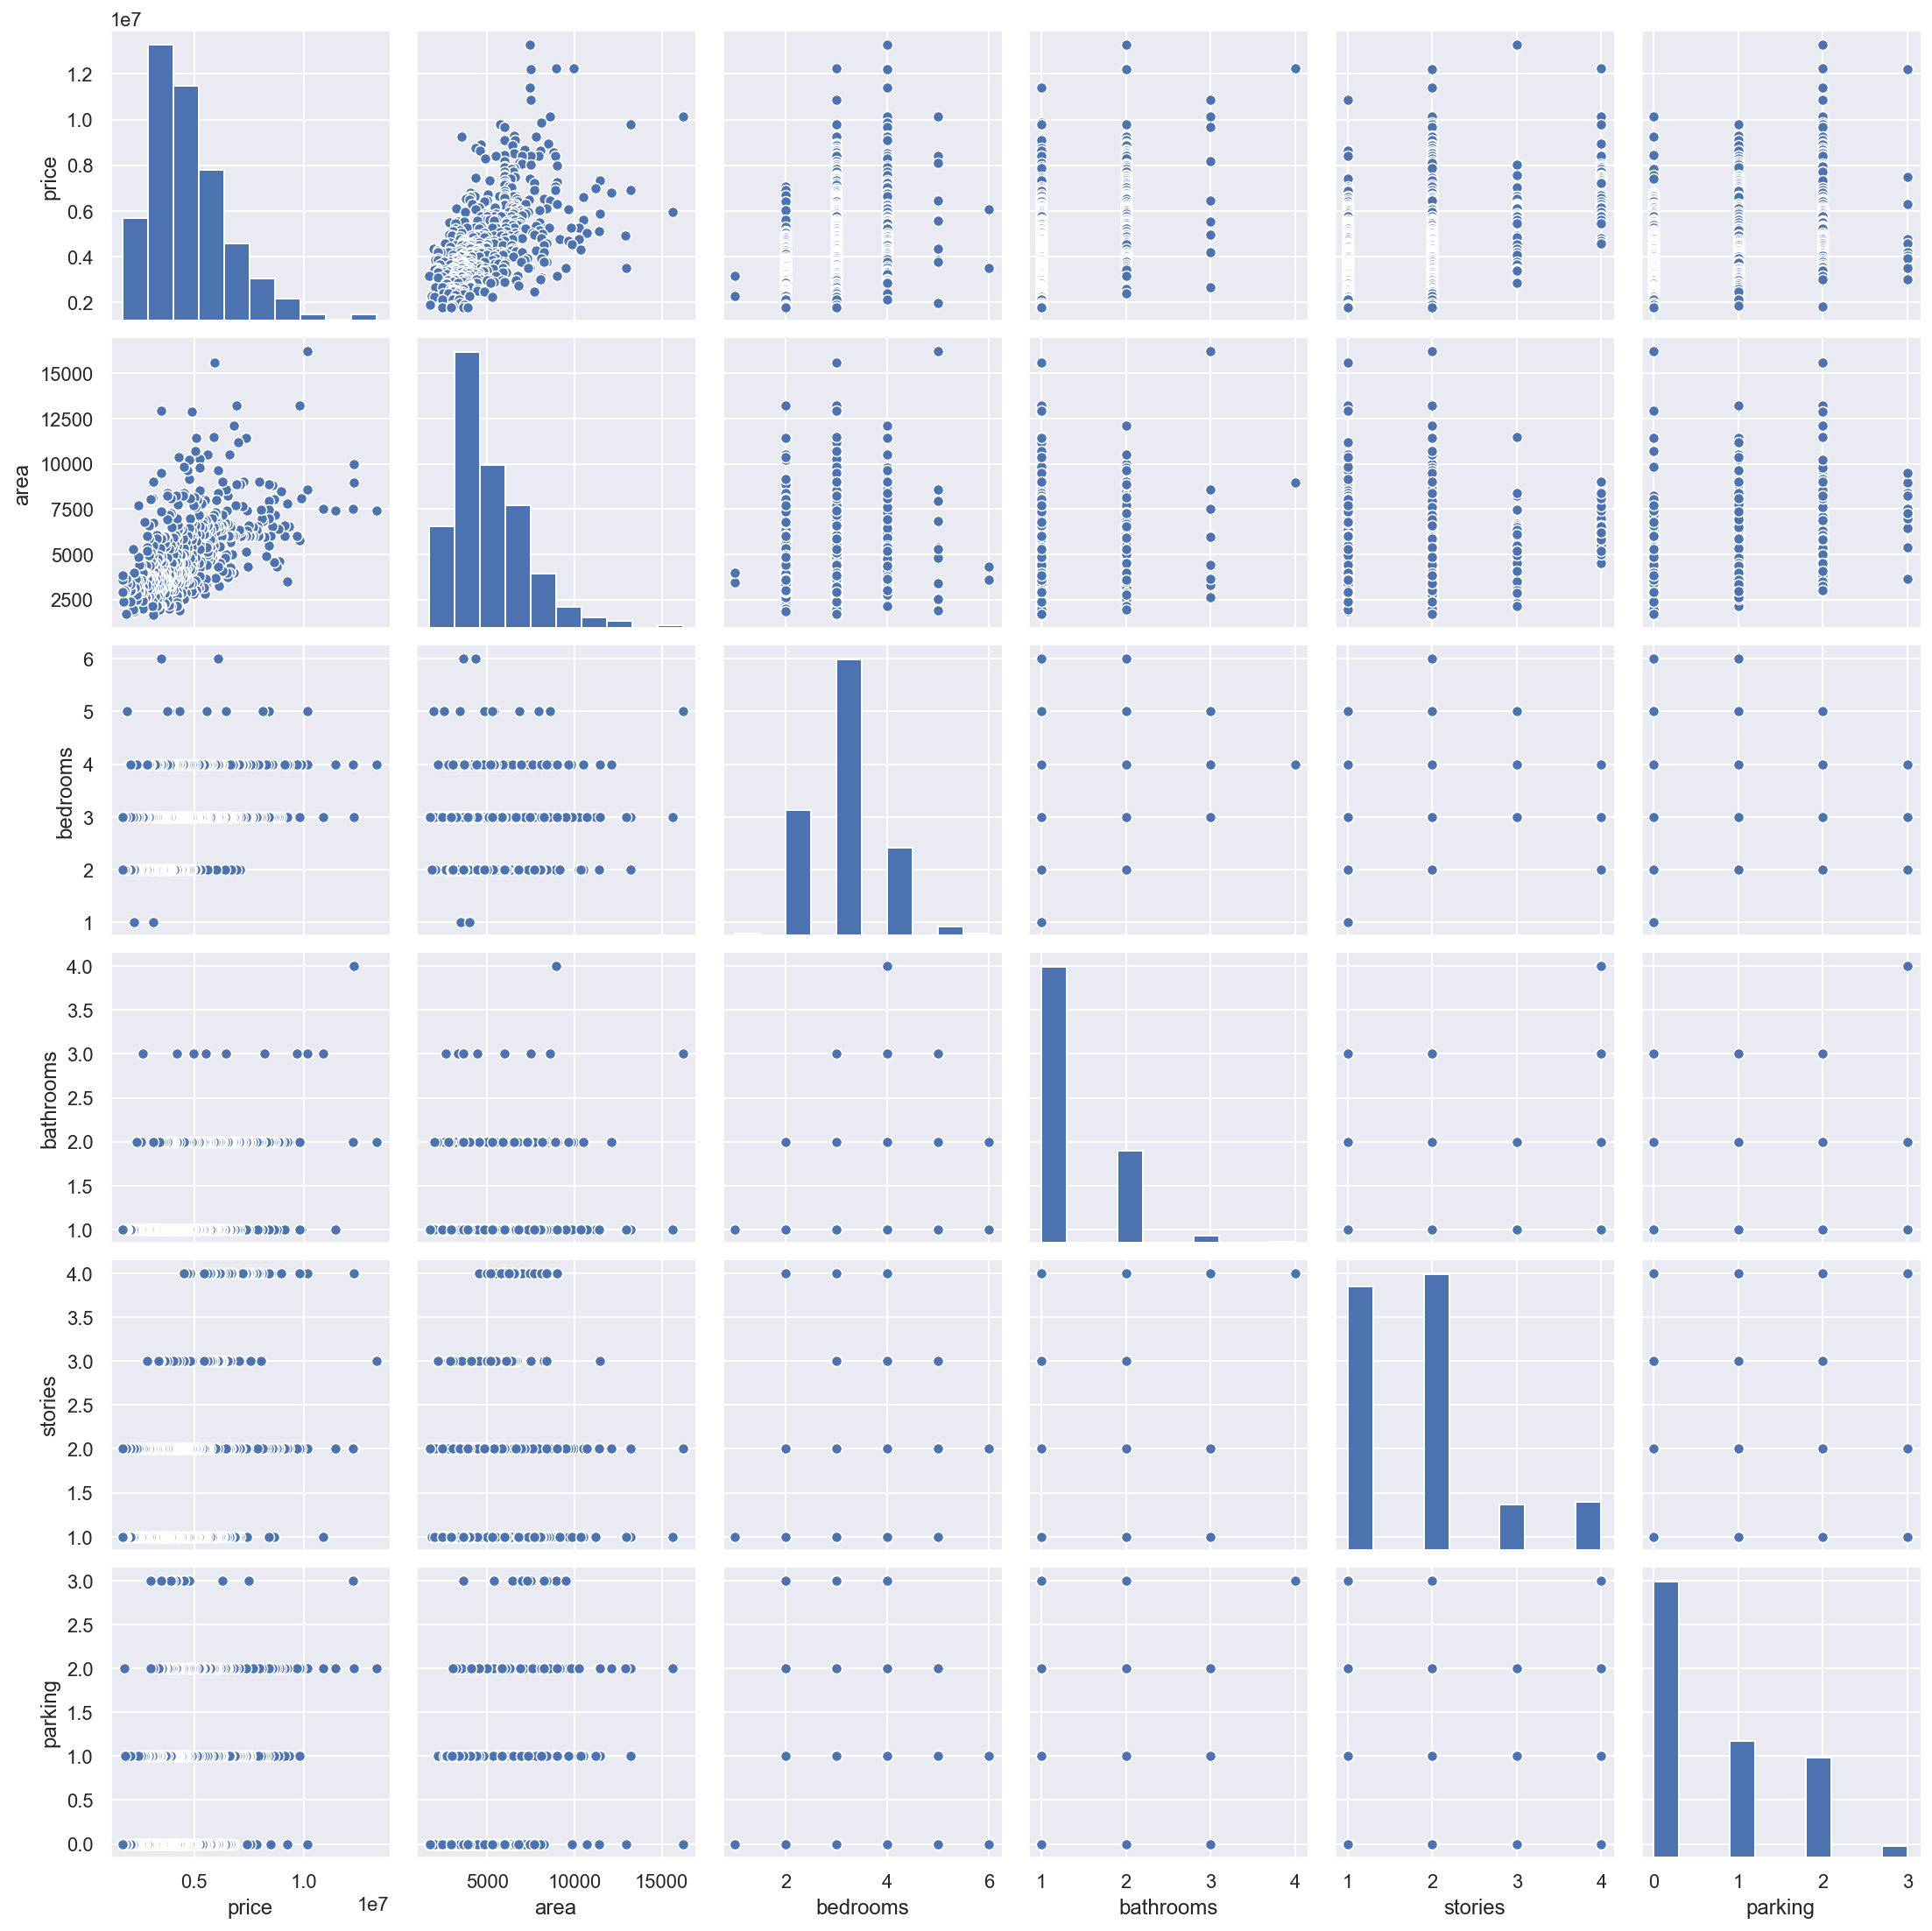

In [8]:
sns.pairplot(housing)
plt.show()

### VISUALIZATION USING CATEGORICAL VARIABLES

In [9]:
# fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(18,10))
# for i in list(housing.select_dtypes("object").columns):
#     sns.boxplot(data=housing,x=housing[i],y="price",ax= ax[0])

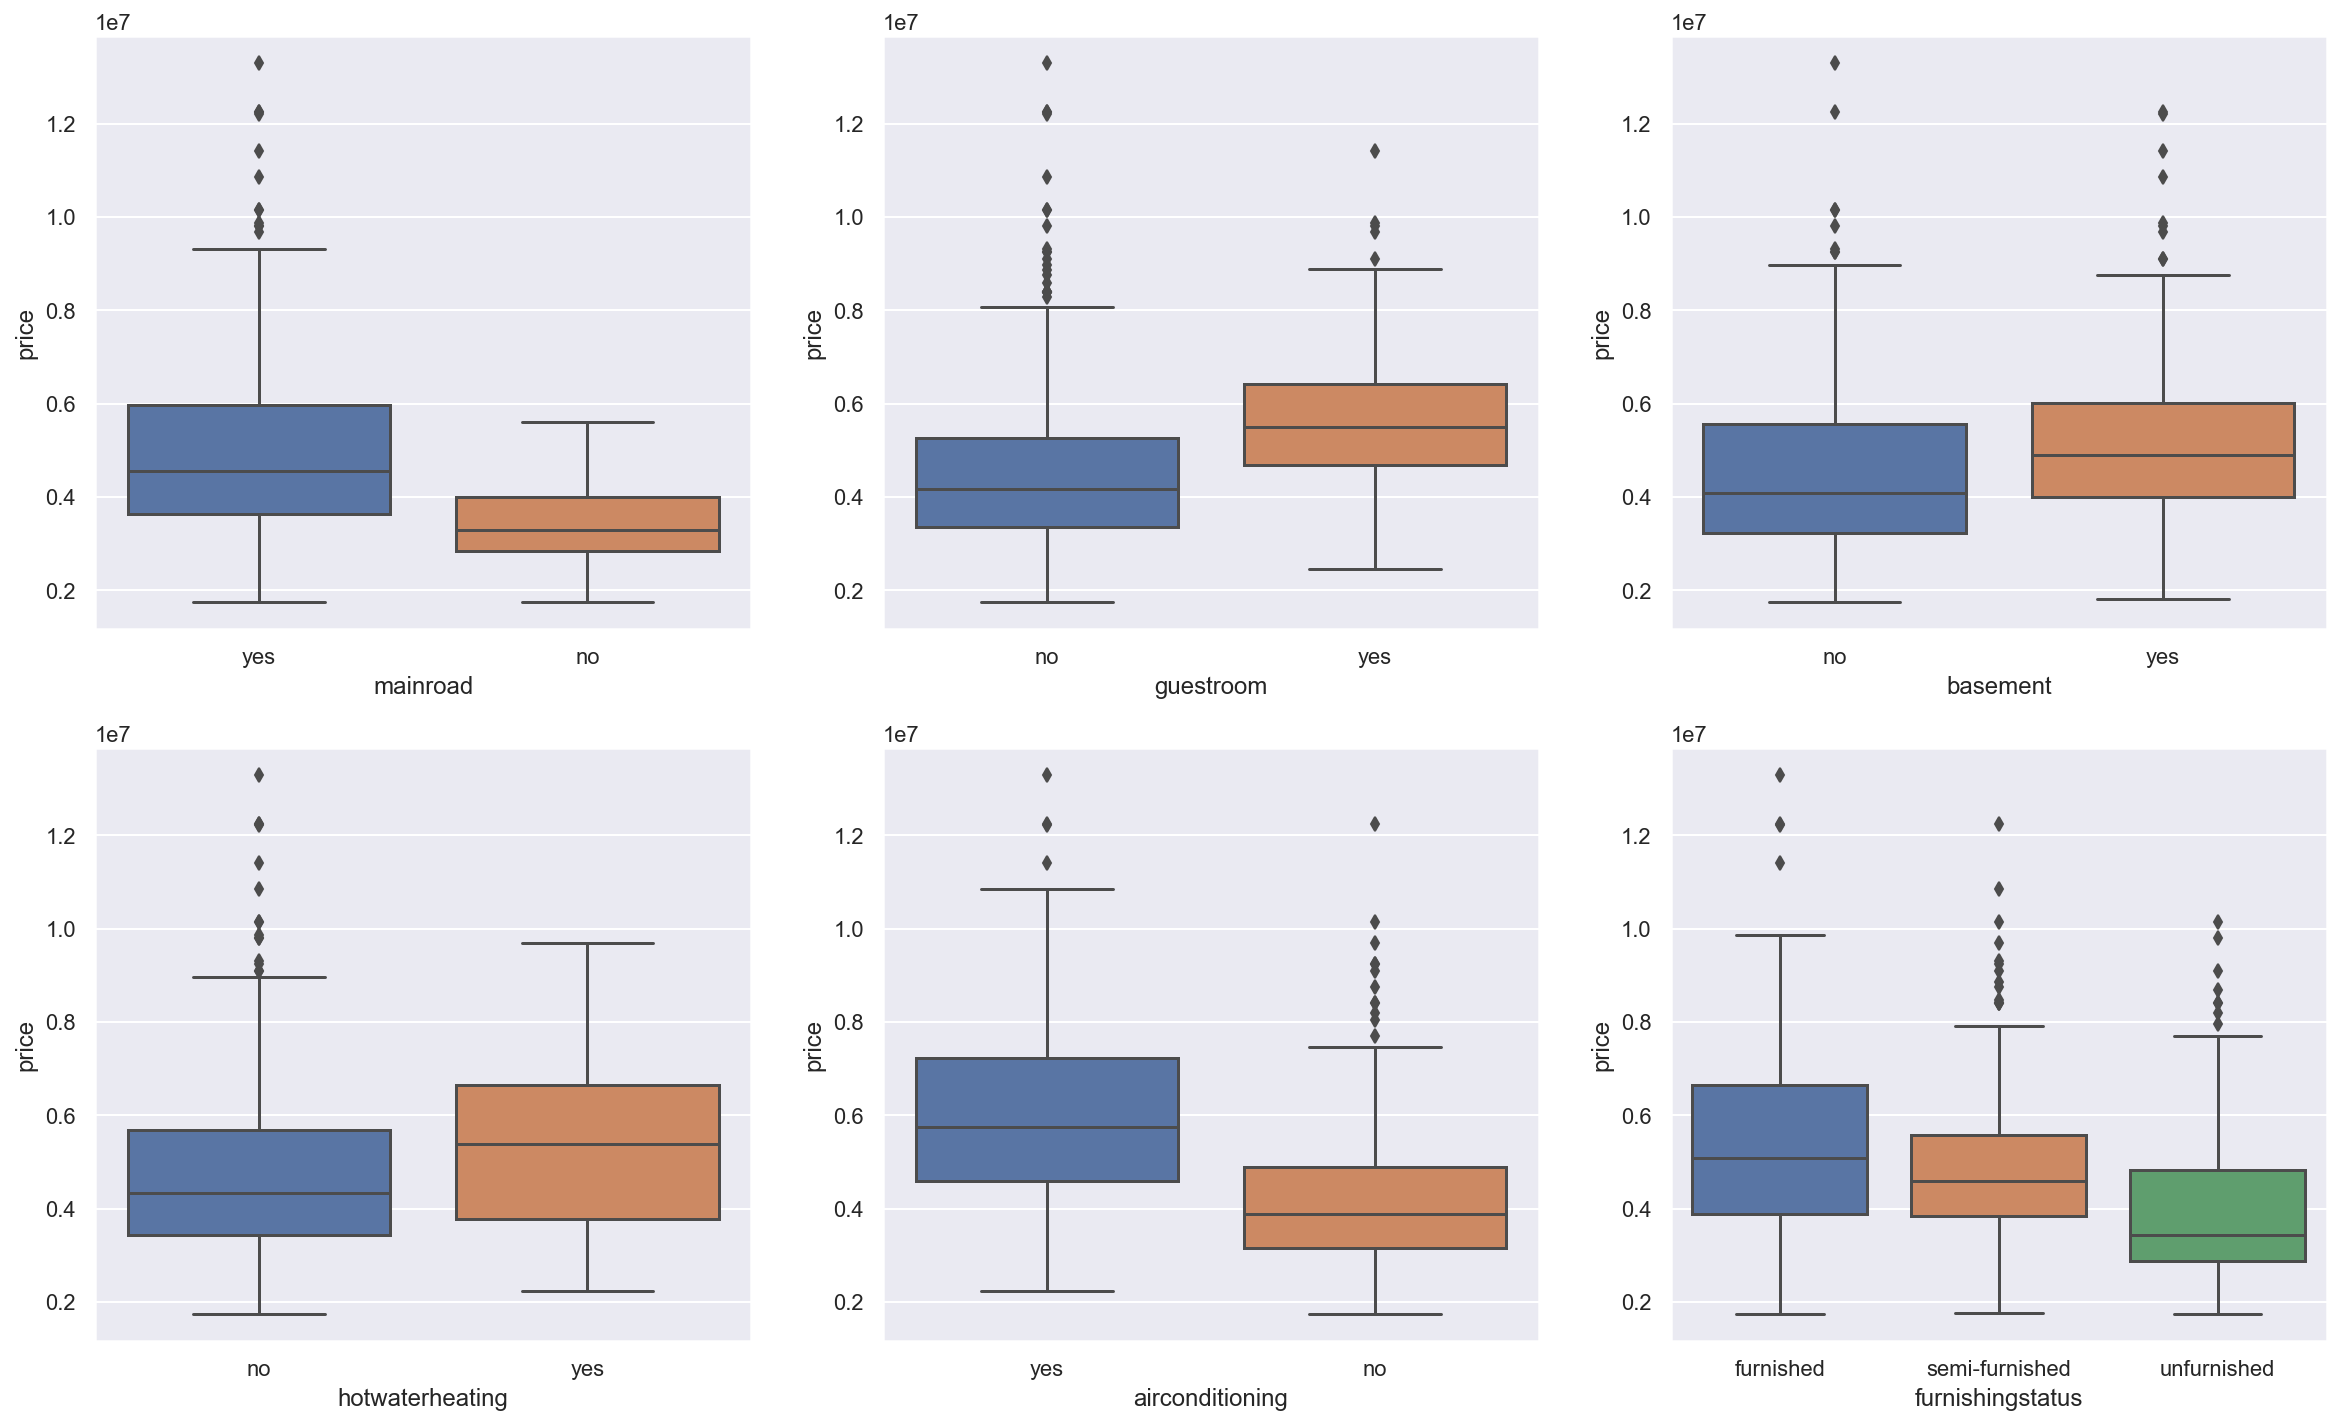

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

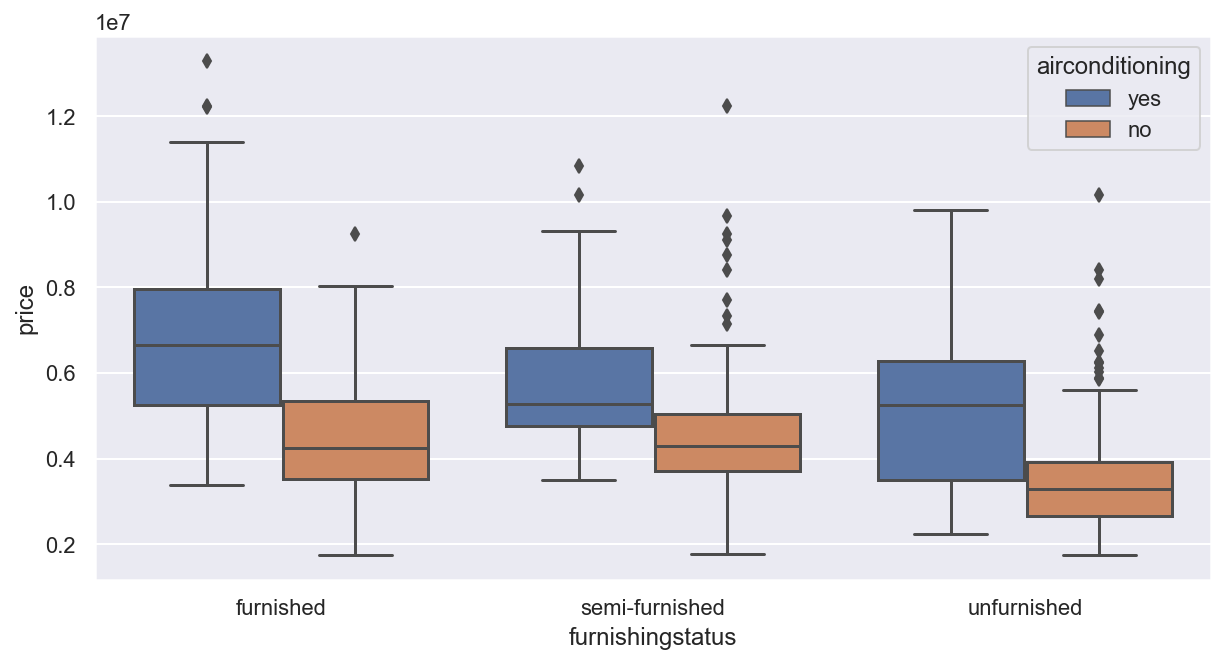

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

## STEP 3: DATA PREPARATION

In [12]:
#CONVORTING THE CATEGORICAL VALUES TO BINARY DIGITS IN ORDER TO FIT A REGRESSION LINE
cat_var = list(housing.select_dtypes('object').columns)
cat_var = ['mainroad', 'guestroom','basement', 'hotwaterheating',
'airconditioning', 'prefarea']
def binary_map(cat_var):
    return cat_var.map({"yes":1,"no":0})
housing[cat_var] = housing[cat_var].apply(binary_map)

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [14]:
status = pd.get_dummies(housing.furnishingstatus,drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
housing = pd.concat([housing, status], axis = 1)
housing = housing.drop(columns="furnishingstatus")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## STEP 4: SPLITTING THE DATA INTO TRAINING AND TESTING SET

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.7, test_size=0.3,
                                     random_state=100)

### RESCALING THE FEATRURES

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
num_var = list(housing.select_dtypes('int64').columns)
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0,1


In [19]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


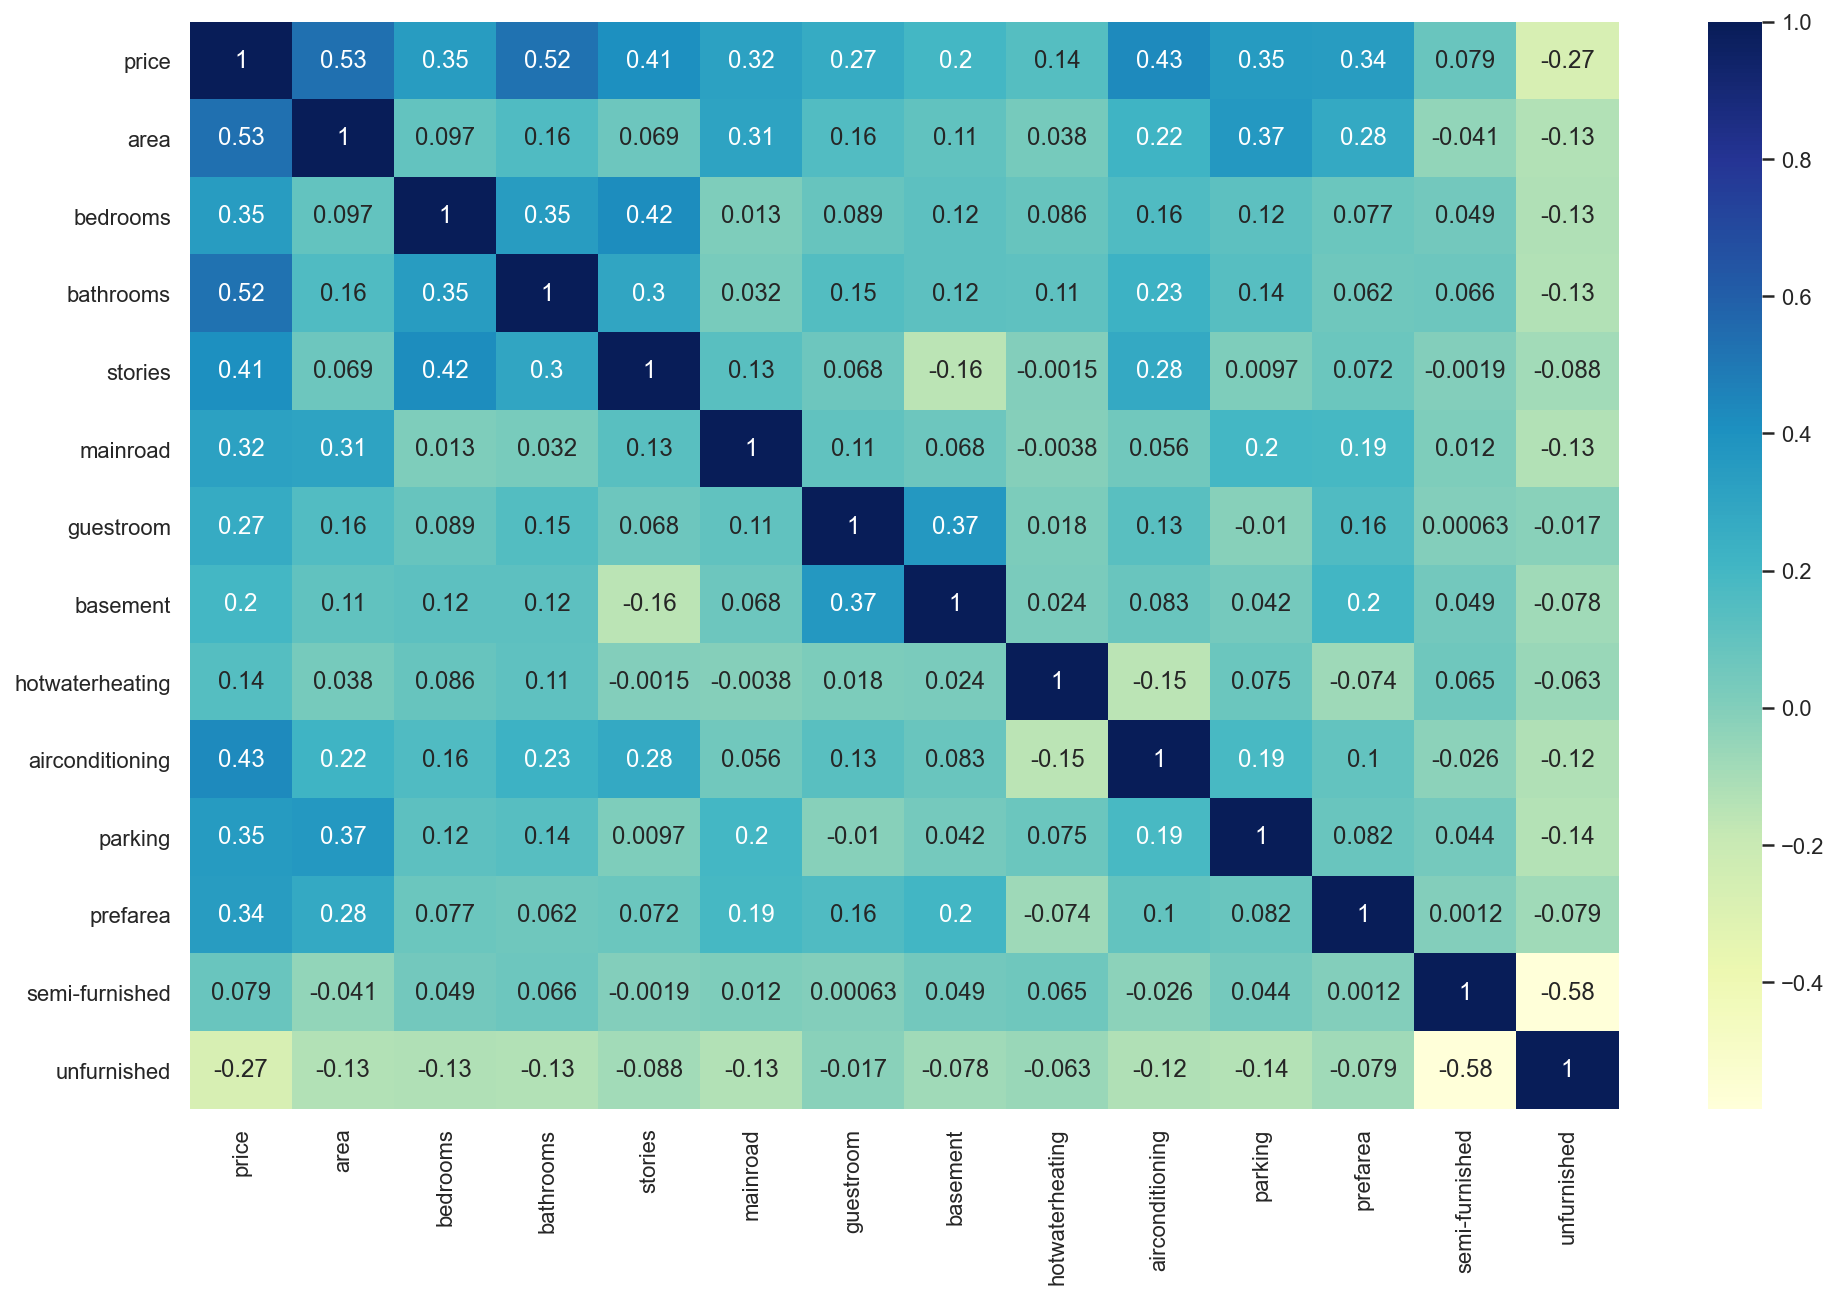

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

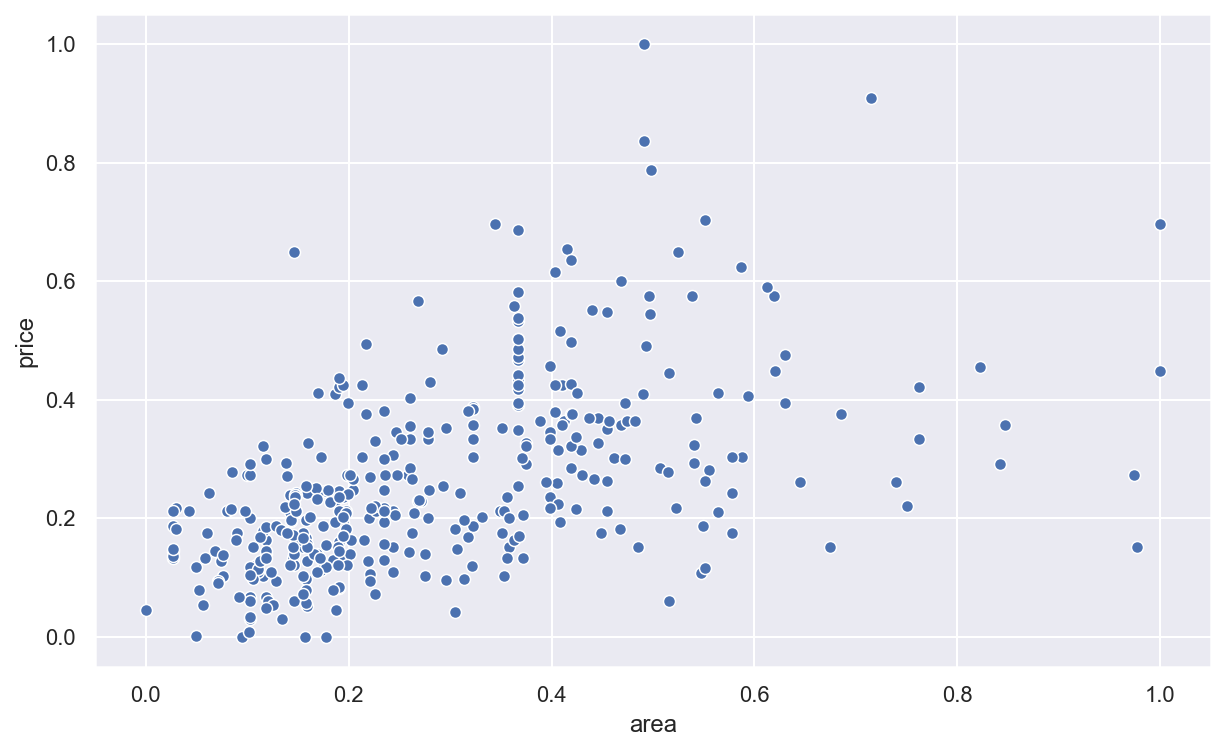

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train, x='area', y='price')
plt.show()

###### THERE IS A HIGH CORRELATION BETWEEN PRICE AND AREA THEREFORE WE WILL TRY TO FIT THE REGRESSION LINE INTO THAT

### DIVIDING SETS INTO X AND Y FOR MODEL BUILDING 

In [22]:
y_train = df_train.pop('price')
X_train = df_train

## STEP 5: BUILDING A LINEAR MODEL

In [23]:
import statsmodels.api as sm

# ADDING CONSTANT
X_train_lm = sm.add_constant(X_train['area'])
lr = sm.OLS(y_train,X_train_lm).fit()

In [24]:
lr.params

const    0.126894
area     0.462192
dtype: float64

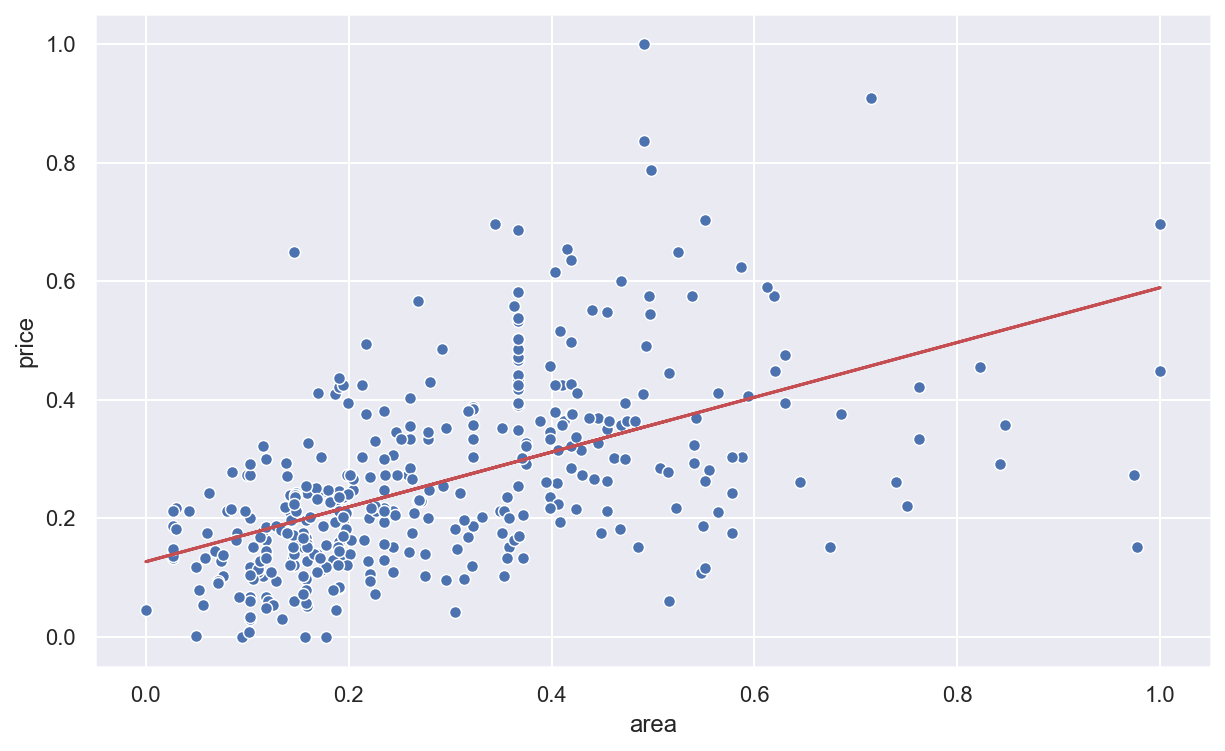

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train, y=y_train ,x=X_train_lm.iloc[:,1])
plt.plot(X_train_lm.iloc[:,1] ,lr.params[0] + lr.params[1]*X_train_lm.iloc[:,1], 'r')
plt.show()

In [26]:
# PRINTING OUT THE STATISTICAL SUMMARY
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.15e-29
Time:                        19:21:05   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

### ADDING ANOTHER VARIABLE
THE R-SQUARED VALUE OBTAINED IS 0.283 WHICH IS LESS, SINCE WE HAVE SO MANY VARIABLES WE CLEARLY CAN DO BETTER THAN THIS, SO LETS GO AHEAD AND ADD MOST HIGH CORRELATED VARIABLE I.E. BATHROOM

In [27]:
# ADDING ANOTHER VARAIABLE IN X AXIS
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[["area","bathrooms"]])

lr = sm.OLS(y_train,X_train_lm).fit()

lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.51e-54
Time:                        19:21:05   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

###### FROM THE STATISTICAL SUMMARY IT IS CLEARLY VISIBLE THAT THE MODEL HAS CLEARLY IMPROVED AS THE R-SQUARED VALUE INCRESED TO 0.480

#### ASSIGNING ALL THE FEATURE VARIABLES TO X

In [29]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms','bedrooms']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.12e-57
Time:                        19:21:05   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

###### R-SQUARED VALUE IMPROVED AGAIN

#### ADDING ALL THE VARIABLES TO THE MODEL

In [31]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [32]:
import statsmodels.api as sm

In [33]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_lm).fit()

lr.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           8.83e-83
Time:                        19:21:05   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

###### LOOKING AT THE P-VALUES SOME OF THE VARIABLES ARENT IMPORTANT FROM THE P-VALUE.
###### WE CAN DROP SOME OF THE COLUMNS, COLUMNS WITH HIGH P-VALUE ALSO WITH HIGH VIF.


#### CHECKING VIF
VIF GIVES A BASIC QUANTATIVE IDEA ABOUT HOW MUCH THE FEATURE VARIABLE ARE CORRELATED WITH EACH OTHER. IT IS AN EXTREMLY IMPORTANT PARAMETER TO TEST LINEAR MIODEL


### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


###### WE GENRALLY KEEP THE VARIABLE WHOSE VIF IS LESS THAN 5. SO THERE ARE CLEARLY SOME VARIABLES THAT CAN BE DROPPED

##### DROPPING SEQUENCE
###### 2. HIGH P-VALUE, HIGH VIF
###### 1. HIGH P VALUE, LOW VIF
###### 3. HIGH VIF, LOW P-VALUE
###### 4. LOW VIF LOW P-VALUE

In [37]:
X = X_train.drop(columns="semi-furnished", axis=1)

In [38]:
X_train_lm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_lm).fit()

lr.params

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.07e-83
Time:                        19:21:05   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [41]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', 1)

In [42]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.73e-84
Time:                        19:21:05   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [44]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


#### Dropping the variable and updating the model

###### As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [45]:
X = X.drop('basement', 1)

In [46]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           3.13e-84
Time:                        19:21:05   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [48]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


###### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## STEP 7: RESIDUAL ANALYSIS

In [49]:
y_train_price = lr_4.predict(X_train_lm)
res = (y_train - y_train_price)

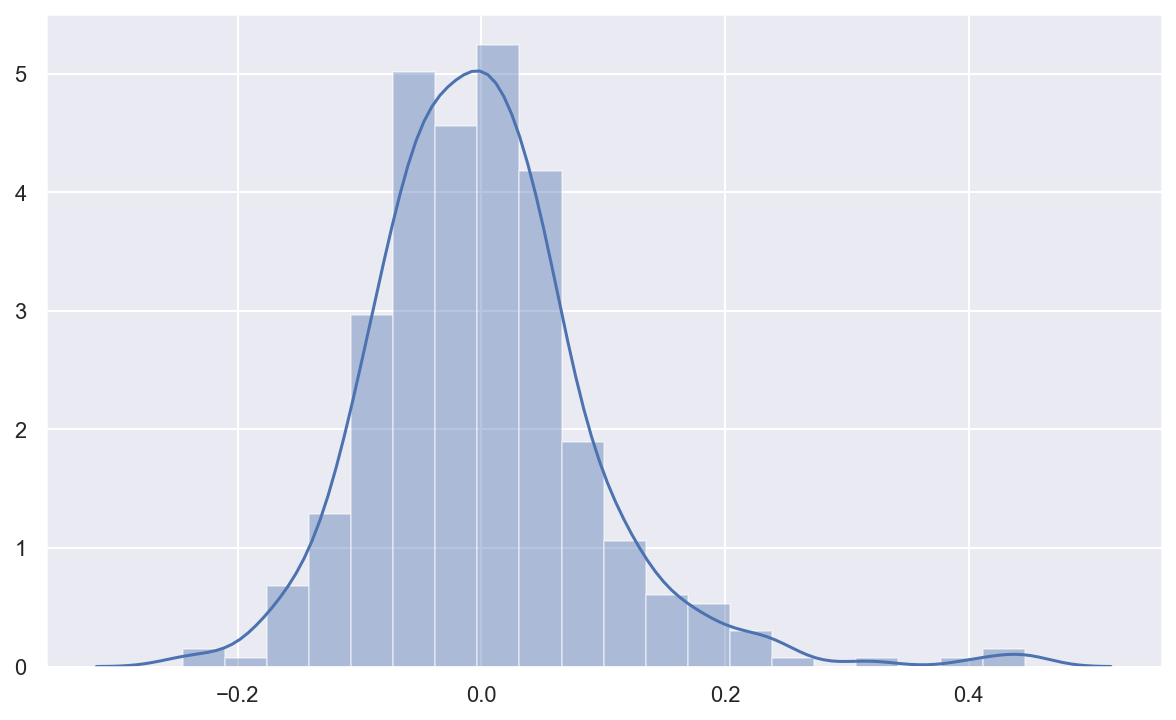

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(res,bins=20)
plt.show()

###### NORMALLY DISTRIBUTED AND ALSO MEAN CENTRED AROUND 0

## STEP 8: MAKING PREDICTIONS USING FINAL MODEL

### SCALING ON THE TEST SETS

In [51]:
num_vars = list(housing.select_dtypes("int64").columns)
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### DIVIDING INTO X AND Y SET

In [53]:
y_test = df_test.pop('price')
X_test = df_test

In [54]:
# ADDING CONSTANT VARIABLE TO TEST DATA FRAME
X_test_m4 = sm.add_constant(X_test)

In [55]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [56]:
y_pred_m4 = lr_4.predict(X_test_m4)

## STEP 9: MODEL EVALUATION
LETS NOW PLOT THE GRAPH FOR ACTUAL VS PREDICTED VALUES

Text(0, 0.5, 'y_pred')

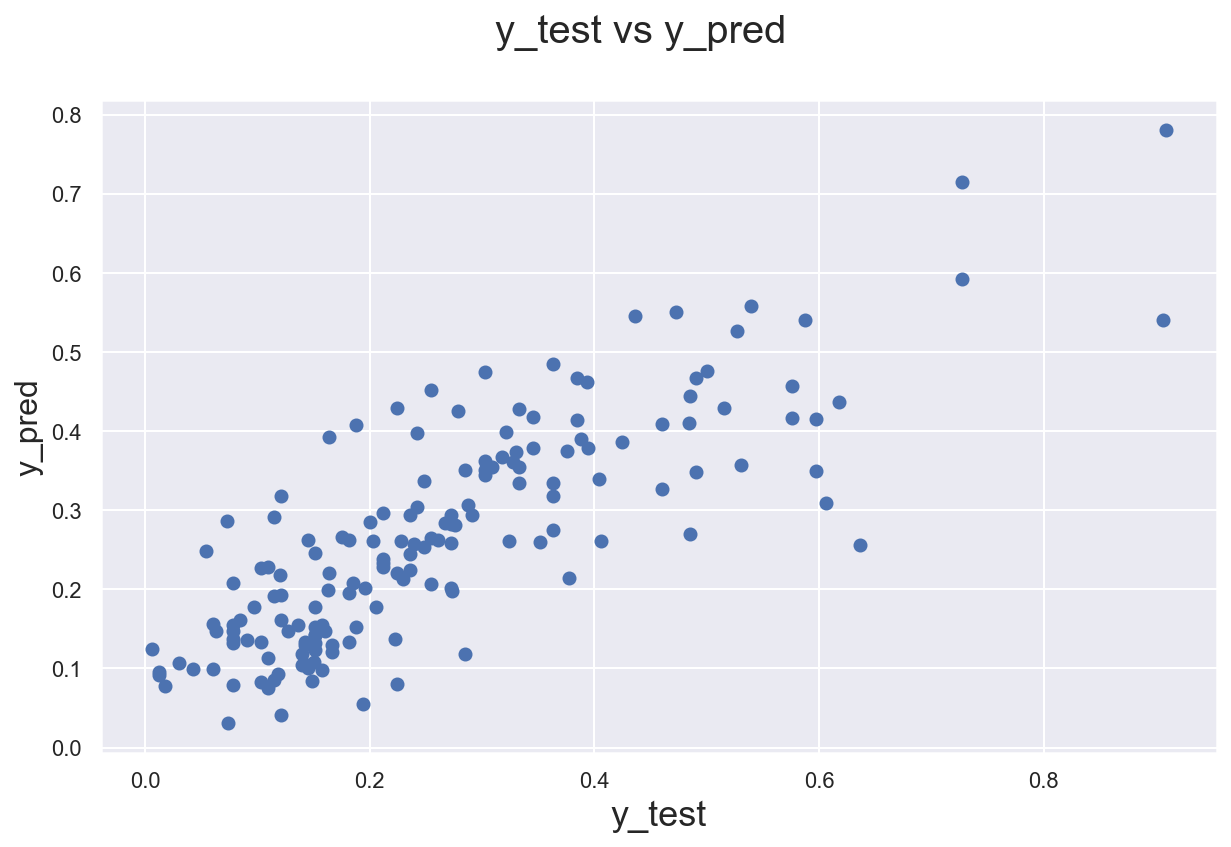

In [57]:
# PLOTTING THE Y-TEST AND Y-PRED TO UNDERSTAND THE SPREAD 

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

###### We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $